In [1]:
from telegram.ext import Updater, InlineQueryHandler, CommandHandler
import requests
import json
import numpy as np

In [2]:
apikey = '3ae2daad-ad9b-45e8-92a9-706338586d0a'
botToken = '836127070:AAH9qhHE8ClBzlJosL4jOtW1KZ4MslVaLHA'

In [3]:
def send_waifu_request(update, context):
    r = requests.get(url="http://localhost:5000/")
    bio = io.BytesIO(r.content)
    i = Image.open(io.BytesIO(r.content))
    update.message

In [4]:
r = requests.get(url="http://localhost:5000/?model=celeb")
r

<Response [200]>

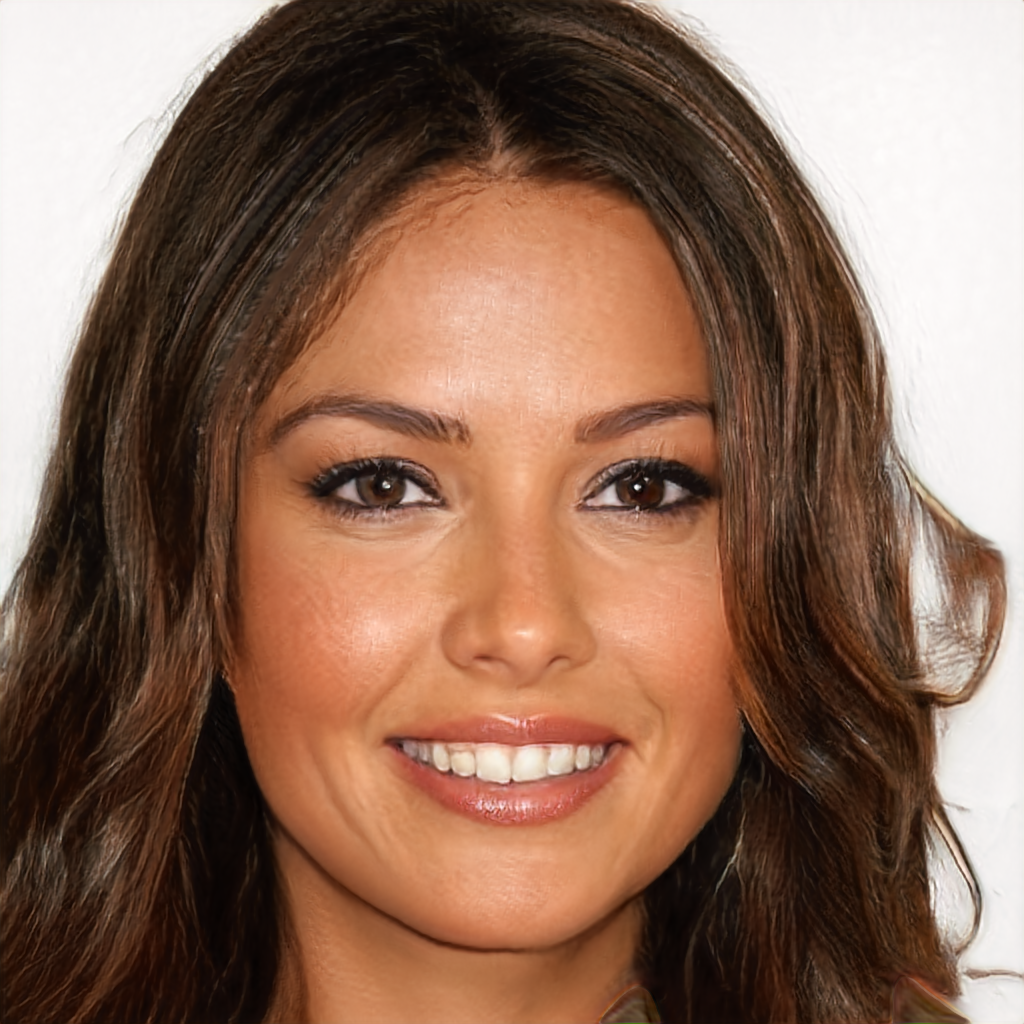

In [5]:

from PIL import Image
import io
#from StringIO import StringIO

i = Image.open(io.BytesIO(r.content))
i

In [6]:
################# Payment functions ##############

def generateCharge(amount,currency="USD"):
    r = requests.post(url = "https://dev-api.opennode.co/v1/charges",
                  headers = {
                        'Content-Type': 'application/json',
                        'Authorization': apikey
                            },
                  data = json.dumps({
                        "amount": amount,
                        "currency": currency,
                        "callback_url": "https://site.com/?handler=opennode",
                        "success_url": "https://site.com/order/abc123"
                            })
                 )
    return r.json()

def paidCharges():
    r = requests.get(url = 'https://dev-api.opennode.co/v1/charges', 
                    headers={
                  'Content-Type': 'application/json',
                  'Authorization': apikey
                        }
                   )
    return r.json()

def chargeInfo(idx):
    r = requests.get(url = 'https://dev-api.opennode.co/v1/charge/'+idx, 
                   headers={
                          'Content-Type': 'application/json',
                          'Authorization': apikey
                        })
    return r.json()

def test(update,context):
    print("test")
    update.message.reply_text('test')
    
    
################# GAN functions ##############
def calculate_cost():
    return np.random.rand()

def get_waifu(update,context):
    print("get_waifu")
    
    payment_id = context.user_data['payment_id']

    info = chargeInfo(payment_id)
    if info['data']['status'] == 'paid':
        r = requests.get(url="http://localhost:5000/")
        # i = Image.open(
        i = io.BytesIO(r.content)
        update.message.reply_photo(i)
    else:
        update.message.reply_text("you didn't pay!")

def request_waifu(update,context):
    print("request_waifu")

    cost = calculate_cost()
    update.message.reply_text("it will cost you %.2f"%cost+' USD')

    charge = generateCharge(cost)
    payreq = charge['data']['lightning_invoice']['payreq']
    
    update.message.reply_text("your payreq here")
    update.message.reply_text(payreq)
    
    payment_id = charge['data']['id']
    
    context.user_data['payment_id'] = payment_id

In [7]:
updater = Updater(botToken,use_context=True)
dp = updater.dispatcher
    
dp.add_handler(CommandHandler('test',test))
dp.add_handler(CommandHandler('request_waifu',request_waifu))
dp.add_handler(CommandHandler('get_waifu',get_waifu)) 

In [ ]:
updater.start_polling()
updater.idle()

test
request_waifu
get_waifu
get_waifu
get_waifu
get_waifu
